In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import geopandas

In [2]:
import sys
sys.path.append('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/')
from BySanti import filter

In [3]:
train = pd.read_csv('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/Datos/Entrenamieto_ECI_2020.csv')
filter.full_correction(train)

In [4]:
train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,4,2015-06-16,...,"(5, 2016)",Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,4,2015-06-16,...,"(1, 2016)",Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(4, 2016)",Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,4,2015-10-20,...,"(4, 2016)",Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [5]:
train[train['Opportunity_Name']==1]['Product_Name']

2336    86
2337    86
2338    86
2339    86
2340    88
2341    88
2342    88
Name: Product_Name, dtype: int64

# Apriori Algorithm and Association Rule. Para productos

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Para empezar hago un Dataset que contenga listas de los productos que se venden juntos

lst=[]
for oportunidad in train['Opportunity_Name'].unique():
    lst2=list(set(train[train['Opportunity_Name']==oportunidad]['Product_Name']))
    if len(lst2)>0:
        lst.append(lst2)
print(lst[0:5])
print(len(lst))

[[99], [100], [91], [432], [432]]
9841


In [17]:
te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
data_x=pd.DataFrame(te_data,columns=te.columns_)
print(data_x.head())

frequent_items= apriori(data_x, use_colnames=True, min_support=0.02)
print(frequent_items.head())

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

     0      1      2      3      4      5      6      7      8      9    ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

     504    505    506    507    508    509    510    511    512    513  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 456 columns]
    support itemsets
0  0.048166      (4)
1  0.0267

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(100),(4),0.096738,0.048166,0.023676,0.244748,5.081359,0.019017,1.260287
1,(4),(100),0.048166,0.096738,0.023676,0.491561,5.081359,0.019017,1.776540
2,(491),(4),0.053247,0.048166,0.046438,0.872137,18.106971,0.043874,7.444196
3,(4),(491),0.048166,0.053247,0.046438,0.964135,18.106971,0.043874,26.397712
4,(4),(495),0.048166,0.035565,0.029977,0.622363,17.499066,0.028264,2.553866
5,(495),(4),0.035565,0.048166,0.029977,0.842857,17.499066,0.028264,6.057126
6,(491),(100),0.053247,0.096738,0.024693,0.463740,4.793771,0.019542,1.684374
7,(100),(491),0.096738,0.053247,0.024693,0.255252,4.793771,0.019542,1.271240
8,(491),(495),0.053247,0.035565,0.034448,0.646947,18.190289,0.032554,2.731696
9,(495),(491),0.035565,0.053247,0.034448,0.968571,18.190289,0.032554,30.123971


In [18]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules = rules[ (rules['antecedent_len'] == 1) & (rules['consequents_len'] == 1)]
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,100,4,0.096738,0.048166,0.023676,0.244748,5.081359,0.019017,1.260287,1,1
1,4,100,0.048166,0.096738,0.023676,0.491561,5.081359,0.019017,1.776540,1,1
2,491,4,0.053247,0.048166,0.046438,0.872137,18.106971,0.043874,7.444196,1,1
3,4,491,0.048166,0.053247,0.046438,0.964135,18.106971,0.043874,26.397712,1,1
4,4,495,0.048166,0.035565,0.029977,0.622363,17.499066,0.028264,2.553866,1,1
5,495,4,0.035565,0.048166,0.029977,0.842857,17.499066,0.028264,6.057126,1,1
6,491,100,0.053247,0.096738,0.024693,0.463740,4.793771,0.019542,1.684374,1,1
7,100,491,0.096738,0.053247,0.024693,0.255252,4.793771,0.019542,1.271240,1,1
8,491,495,0.053247,0.035565,0.034448,0.646947,18.190289,0.032554,2.731696,1,1
9,495,491,0.035565,0.053247,0.034448,0.968571,18.190289,0.032554,30.123971,1,1


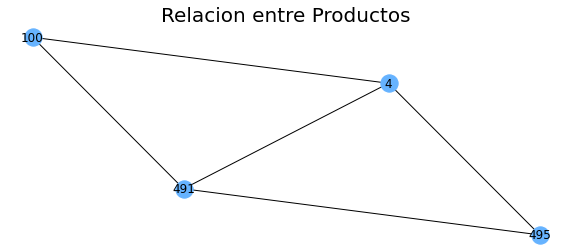

In [19]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,node_color="#66b3ff",with_labels=True)
plt.title('Relacion entre Productos', size=20)
plt.show()

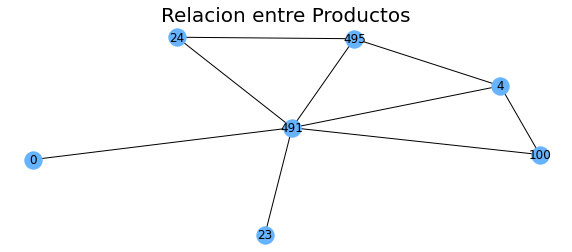

In [16]:
#Esto lo hice cambiando los parametros en frequent_items= apriori(data_x, use_colnames=True, min_support=0.015)


fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,node_color="#66b3ff",with_labels=True)
plt.title('Relacion entre Productos', size=20)
plt.show()